In [1]:
# inspired by: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, classification_report, confusion_matrix

n_samples = 300;
n_clusters = 3        # 2-5 
noise_level = 1.20    
random_state = 2


# Make and visualize Training data

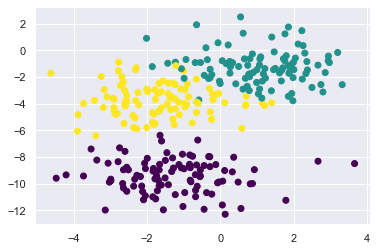

In [2]:

# Generate the training data and true classification.
X_train, y_train = make_blobs(n_samples=n_samples, 
                              centers=n_clusters, 
                              cluster_std=noise_level, 
                              random_state=random_state);

# Show the data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')


# Fit the Model

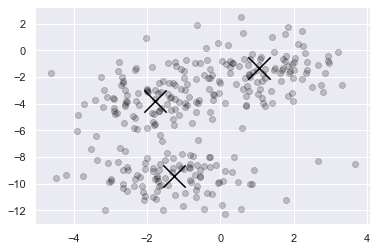

In [22]:

kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
kmeans.fit(X_train);
centers = kmeans.cluster_centers_

plt.scatter(X_train[:, 0], X_train[:, 1], c="black", alpha=.2)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=500, marker="x")


### Find the Clusters

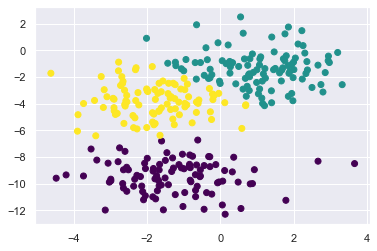

In [15]:

y_predict_train_temp = kmeans.predict(X_train)

# Correction for random cluster number
closest, _ = pairwise_distances_argmin_min(centers, X_train)
center_value = [y_train[i] for i in closest]
y_predict_train =  [center_value[i] for i in y_predict_train_temp]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_predict_train, cmap='viridis');



### Quantify the Performance

In [7]:

# Since we know the solution, 
print(classification_report(y_train, y_predict_train))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.93      0.97      0.95       100
           2       0.96      0.93      0.94       100

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# Lets try it out on new data

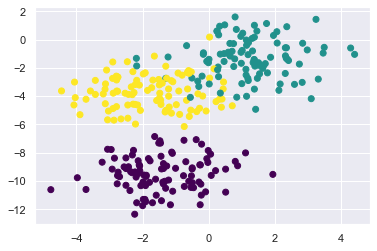

In [16]:

# Generate the new data to see how well the model performs.
X_test, y_test_temp = make_blobs(n_samples=n_samples, 
                                  centers=centers, 
                                  cluster_std=noise_level, 
                                  random_state=random_state + 1);

# Correction for random cluster number
closest, _ = pairwise_distances_argmin_min(centers, X_test)
center_value_test = [y_test_temp[i] for i in closest]
y_test =  [center_value[center_value_test[i]] for i in y_test_temp]


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis');



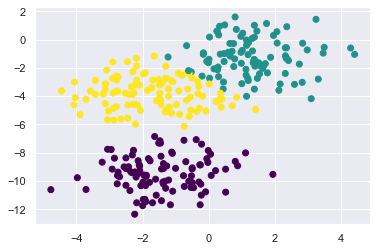

In [17]:

y_predict_test_temp = kmeans.predict(X_test);

# Correction for random cluster number
y_predict_test =  [center_value[center_value_test[i]] for i in y_predict_test_temp]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predict_test, cmap='viridis');


# How well did it work?

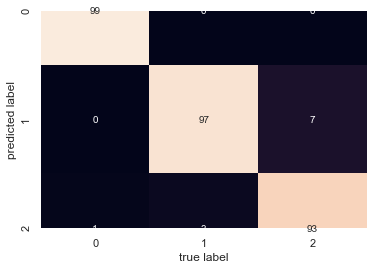

In [18]:

mat = confusion_matrix(y_train, y_predict_train)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label');
plt.ylabel('predicted label');


In [19]:

print(classification_report(y_predict_test, y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.89      0.93      0.91        96
           2       0.93      0.89      0.91       104

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### Visualize the misclassifications 

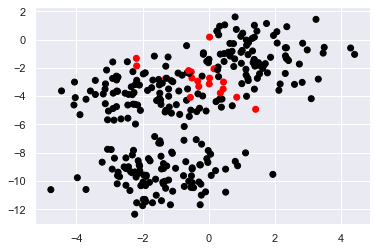

In [21]:

x = X_test[:, 0]
y = X_test[:, 1]

matches = [y_predict_test[i] == y_test[i] for i in range(len(x))]
colors = ['black' if match else 'red' for match in matches]

plt.scatter(x, y, c=colors);
    